# PREMİER LİG VERİMLİLİK SKORU

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("premier-player-23-24.csv")

In [7]:
df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [9]:
df.isnull().sum()

Player         0
Nation         0
Pos            0
Age            0
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
Team           0
dtype: int64

In [11]:
df[['Gls', 'Ast', 'xG', 'npxG', 'xAG', 'npxG+xAG']].describe().T

,count,mean,std,min,25%,50%,75%,max
Gls,580.0,2.063793,3.621238,0.0,0.0,1.00,2.0,27.0
Ast,580.0,1.481034,2.360729,0.0,0.0,0.00,2.0,13.0
xG,580.0,2.076034,3.402254,0.0,0.1,0.80,2.5,29.2
npxG,580.0,1.929655,2.977988,0.0,0.1,0.75,2.5,22.9
xAG,580.0,1.493793,2.115351,0.0,0.1,0.70,2.0,11.8
npxG+xAG,580.0,3.425690,4.634031,0.0,0.2,1.60,4.5,27.3


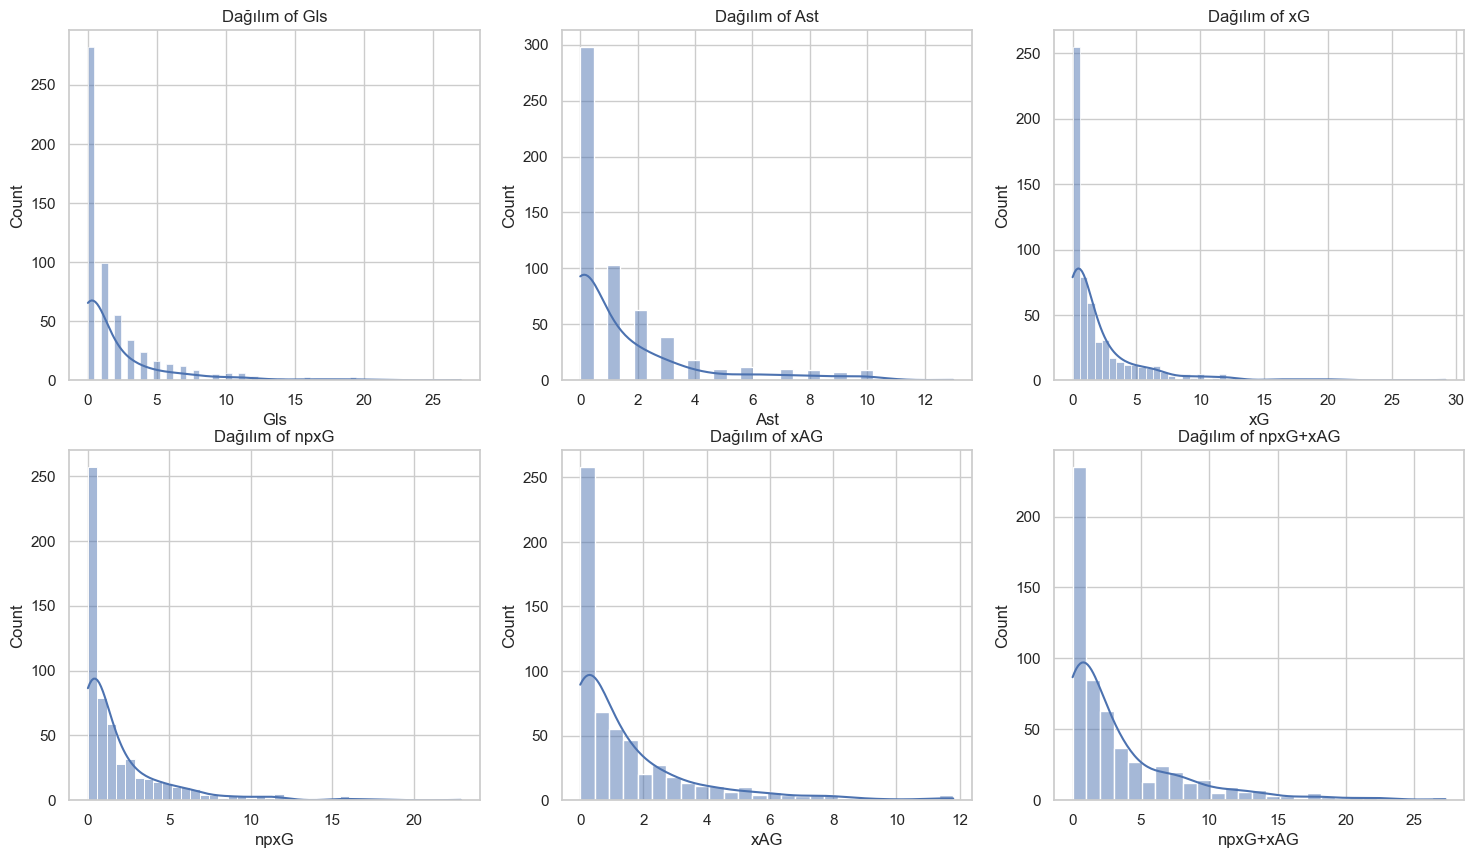

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
metrics = ['Gls', 'Ast', 'xG', 'npxG', 'xAG', 'npxG+xAG']

for i, metric in enumerate(metrics):
    sns.histplot(df[metric], kde=True, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Dağılım of {metric}')

plt.show()

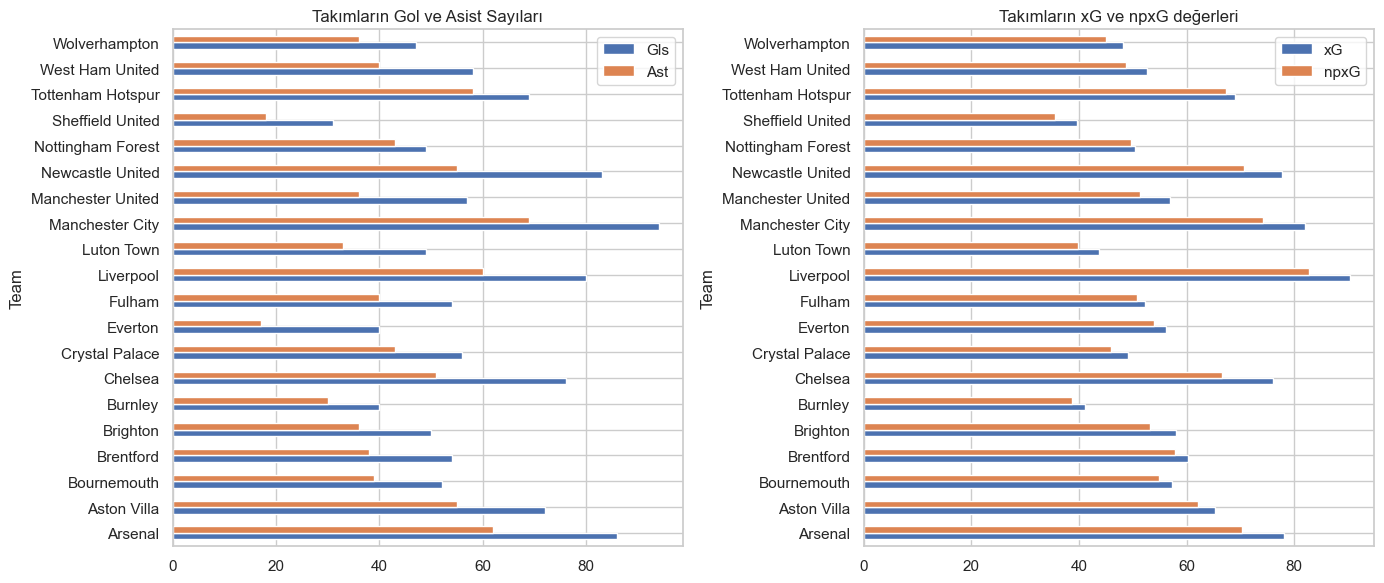

In [89]:
team_performance = df.groupby('Team').agg({
    'Gls': 'sum',
    'Ast': 'sum',
    'xG': 'sum',
    'npxG': 'sum',
    'xAG': 'sum'
}).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
team_performance.plot(kind='barh', x='Team', y=['Gls', 'Ast'], ax=axs[0], legend=True)
team_performance.plot(kind='barh', x='Team', y=['xG', 'npxG'], ax=axs[1], legend=True)

axs[0].set_title('Takımların Gol ve Asist Sayıları')
axs[1].set_title('Takımların xG ve npxG değerleri')
plt.tight_layout()
plt.show()

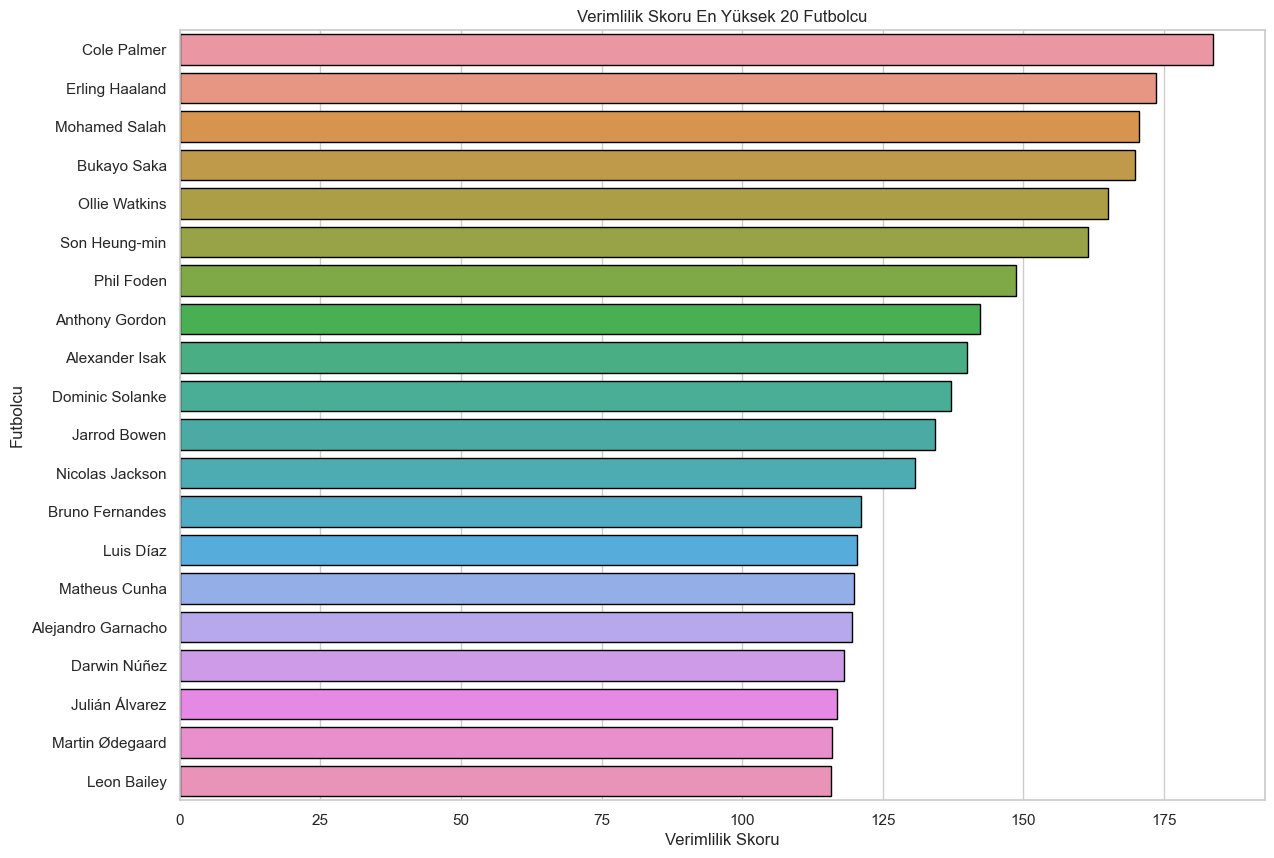

In [81]:
alpha = 2.0  # Gol
beta = 1.5   # Asist
gamma = 1.2  # xG
delta = 1.0  # xAG
epsilon = 0.5 # Oynama Süresi
zeta = 0.7   # npxG
eta = 0.3    # PrgC
theta = 1.0  # G+A

df['Efficiency_Score'] = (alpha * df['Gls'] +
                          beta * df['Ast'] +
                          gamma * df['xG'] +
                          delta * df['xAG'] +
                          epsilon * df['90s'] +
                          zeta * df['npxG'] +
                          eta * df['PrgC'] +
                          theta * df['G+A'])

top_20_players = df[['Player', 'Pos', 'Efficiency_Score']].sort_values(by='Efficiency_Score', ascending=False).head(20)

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

bar_plot = sns.barplot(x='Efficiency_Score', y='Player', data=top_20_players, edgecolor='black')

plt.xlabel('Verimlilik Skoru')
plt.ylabel('Futbolcu')
plt.title('Verimlilik Skoru En Yüksek 20 Futbolcu')

plt.show()

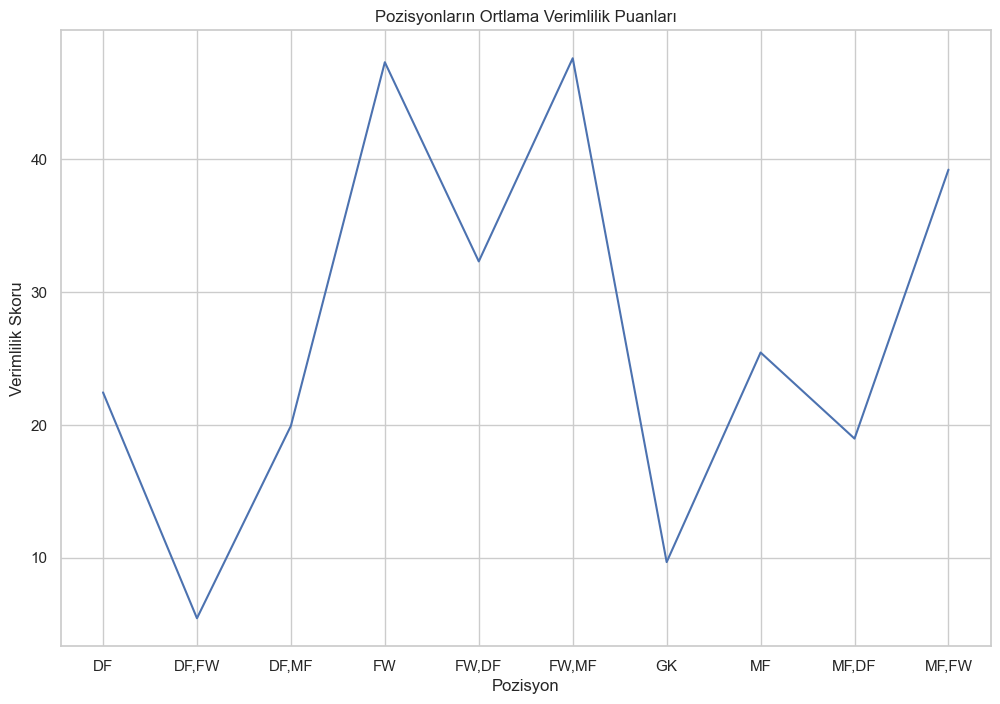

In [79]:
seasonal_performance = df.groupby('Pos')['Efficiency_Score'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x=seasonal_performance.index, y=seasonal_performance.values)
plt.title('Pozisyonların Ortlama Verimlilik Puanları')
plt.xlabel('Pozisyon')
plt.ylabel('Verimlilik Skoru')
plt.show()

In [25]:
# Gol kralı
top_scorer = df[['Player', 'Gls']].sort_values(by='Gls', ascending=False).head(1)

# Asist kralı
top_assist = df[['Player', 'Ast']].sort_values(by='Ast', ascending=False).head(1)

# Gol + Asist kralı
top_goal_assist = df[['Player', 'G+A']].sort_values(by='G+A', ascending=False).head(1)

# Pas kralı
top_pass = df[['Player', 'PrgP']].sort_values(by='PrgP', ascending=False).head(1)

# xG kralı
top_xg = df[['Player', 'xG']].sort_values(by='xG', ascending=False).head(1)

# xAG kralı
top_xag = df[['Player', 'xAG']].sort_values(by='xAG', ascending=False).head(1)

print("Gol Kralı:")
print(top_scorer.to_string(index=False, header=False))
print("\n" + "-"*30 + "\n")

print("Asist Kralı:")
print(top_assist.to_string(index=False, header=False))
print("\n" + "-"*30 + "\n")

print("Gol + Asist Kralı:")
print(top_goal_assist.to_string(index=False, header=False))
print("\n" + "-"*30 + "\n")

print("Pas Kralı:")
print(top_pass.to_string(index=False, header=False))
print("\n" + "-"*30 + "\n")

print("xG Kralı:")
print(top_xg.to_string(index=False, header=False))
print("\n" + "-"*30 + "\n")

print("xAG Kralı:")
print(top_xag.to_string(index=False, header=False))

Gol Kralı:
Erling Haaland 27.0

------------------------------

Asist Kralı:
Ollie Watkins 13.0

------------------------------

Gol + Asist Kralı:
Cole Palmer 33.0

------------------------------

Pas Kralı:
Rodri 376.0

------------------------------

xG Kralı:
Erling Haaland 29.2

------------------------------

xAG Kralı:
Bruno Fernandes 11.8


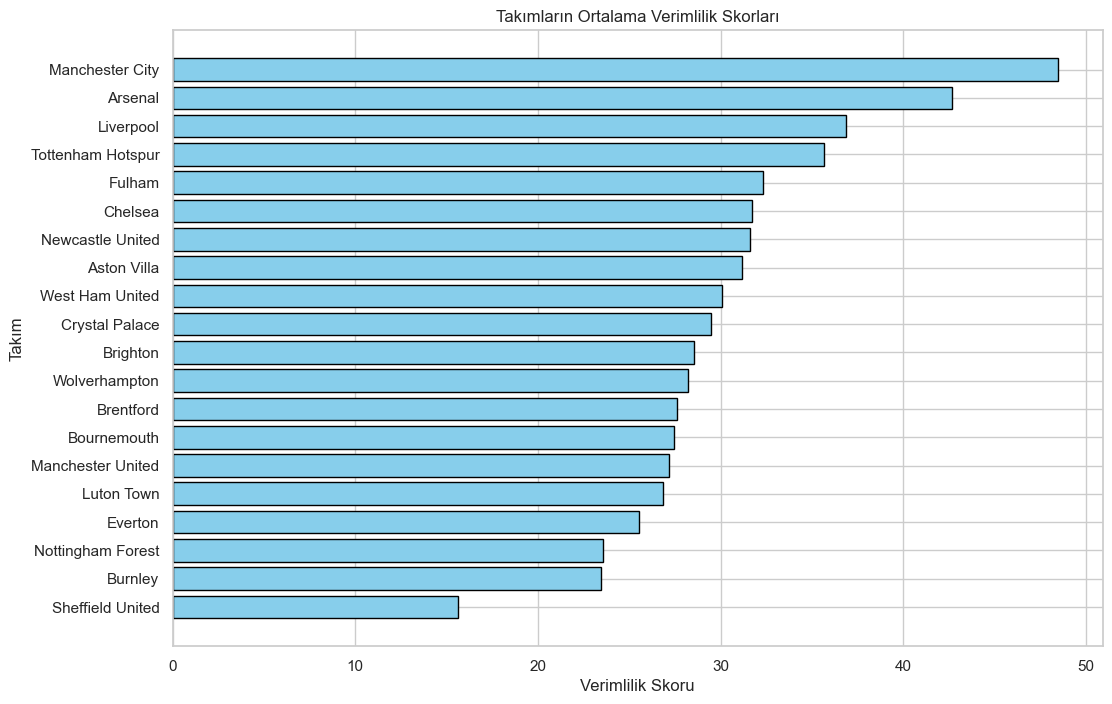

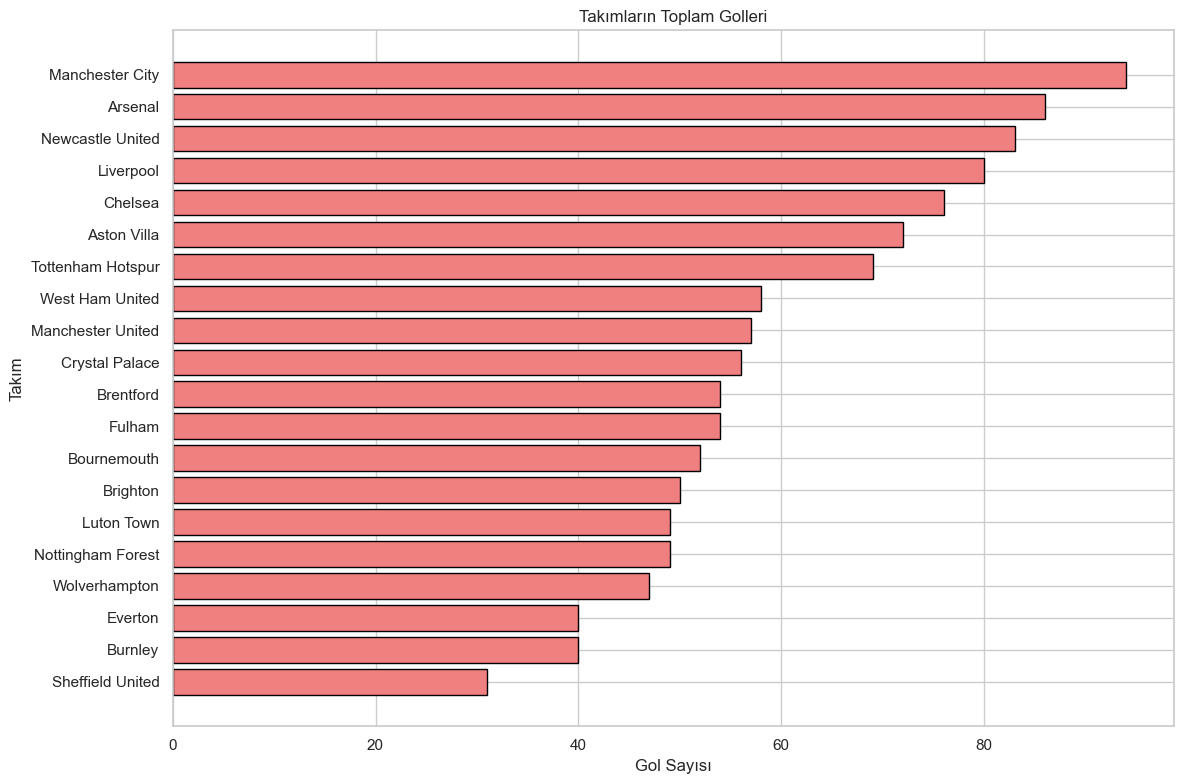

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

team_avg_efficiency = df.groupby('Team')['Efficiency_Score'].mean().reset_index()
team_avg_efficiency = team_avg_efficiency.sort_values(by='Efficiency_Score', ascending=True)


plt.figure(figsize=(12, 8))
plt.barh(team_avg_efficiency['Team'], team_avg_efficiency['Efficiency_Score'], color='skyblue', edgecolor='black')
plt.xlabel('Verimlilik Skoru')
plt.ylabel('Takım')
plt.title('Takımların Ortalama Verimlilik Skorları')
plt.show()

team_total_goals = df.groupby('Team')['Gls'].sum().reset_index()
team_total_goals = team_total_goals.sort_values(by='Gls', ascending=True)


plt.figure(figsize=(12, 8))
plt.barh(team_total_goals['Team'], team_total_goals['Gls'], color='lightcoral', edgecolor='black')
plt.xlabel('Gol Sayısı')
plt.ylabel('Takım')
plt.title('Takımların Toplam Golleri')
plt.tight_layout()
plt.show()

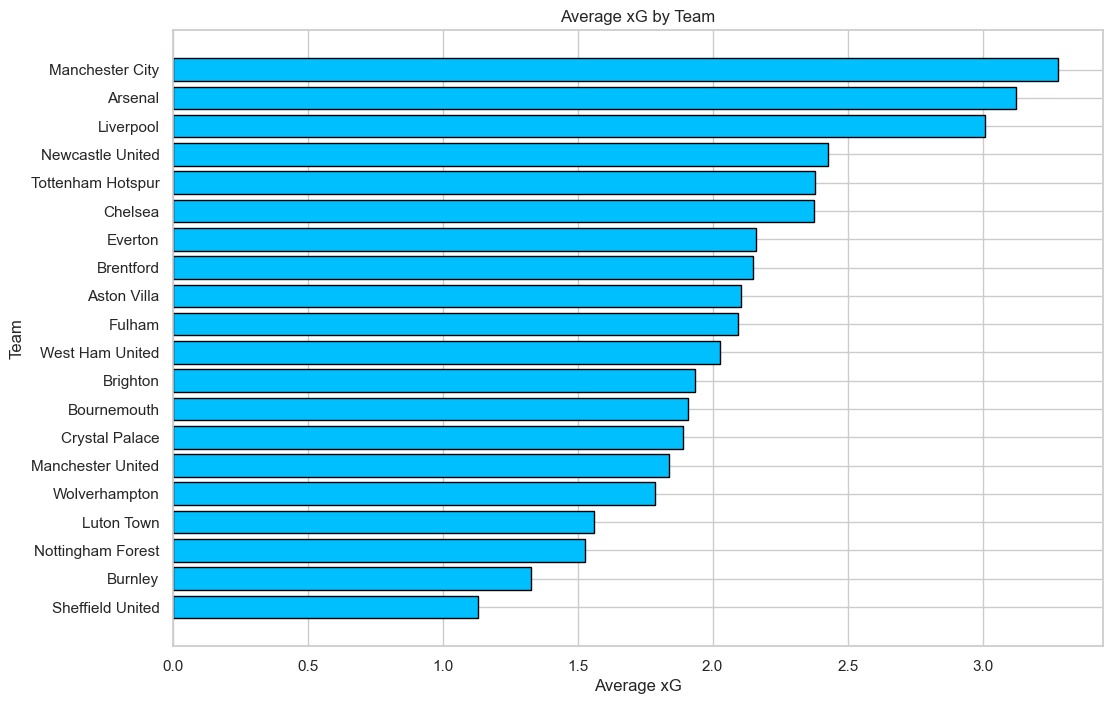

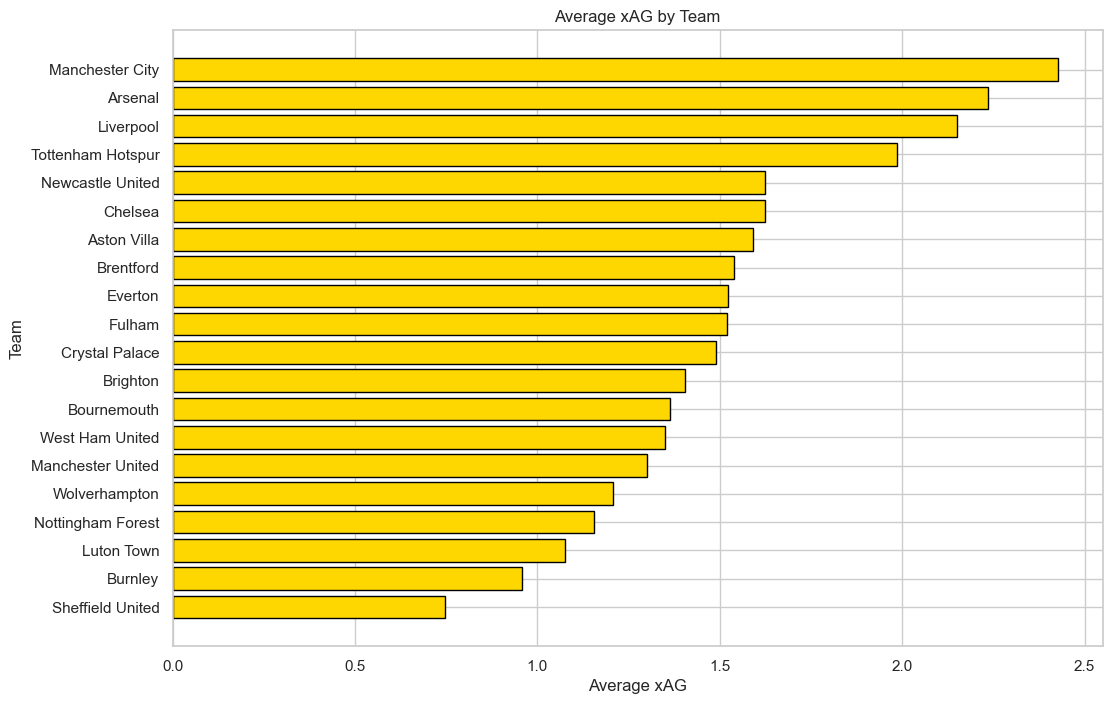

In [29]:
import matplotlib.pyplot as plt

team_avg_xg = df.groupby('Team')['xG'].mean().reset_index()
team_avg_xg = team_avg_xg.sort_values(by='xG', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(team_avg_xg['Team'], team_avg_xg['xG'], color='deepskyblue', edgecolor='black')
plt.xlabel('Average xG')
plt.ylabel('Team')
plt.title('Average xG by Team')
plt.show()

team_avg_xag = df.groupby('Team')['xAG'].mean().reset_index()
team_avg_xag = team_avg_xag.sort_values(by='xAG', ascending=True)

plt.figure(figsize=(12, 8))
plt.barh(team_avg_xag['Team'], team_avg_xag['xAG'], color='gold', edgecolor='black')
plt.xlabel('Average xAG')
plt.ylabel('Team')
plt.title('Average xAG by Team')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = df[['xG', 'xAG', 'G+A', '90s', 'PrgC']]  
target = df['Efficiency_Score']  # Hedef değişken 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Ortalama Kare Hatası (MSE): {mse:.2f}")
print(f"R^2 Skoru: {r2:.2f}")

Ortalama Kare Hatası (MSE): 20.21
R^2 Skoru: 0.99


In [33]:
y_pred

array([  0.27167065,  11.25438299,   5.19515194,  76.98331281,
        28.27769877,  18.83606479,  30.18969797,  17.93670578,
        10.34256734,   3.51951747,   8.00112037,  24.67057495,
        11.60123049,  54.15883647,   7.15207708,   0.20619029,
       149.93287667,  49.12007177,  54.86384055,   1.98419543,
         3.26803462,  17.92124059,  15.27311402,  16.91250392,
        15.10962646,  27.49884449,  35.49620821,  90.09942744,
        32.48171533,  14.74617075,  72.19400211,  26.60723279,
       120.7553211 ,  25.97220433,  34.82862431,  19.14132813,
         0.69429082,  63.97123592,   8.28012857,   0.38153038,
         0.21252324,  46.58478834,   0.53005484,  35.72075687,
         0.83878733,   4.46609222, 140.41315134,   2.481998  ,
         2.80764651,   0.86763958, 102.70153731,   3.46679617,
        13.77097584,  25.97734333,  16.26319282,   4.40447235,
         2.46133426,   0.75820938,   4.59253657,  21.94042497,
       170.08510593,  41.56327906,  56.42002619,   3.51

In [39]:
df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,Efficiency_Score
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City,97.29
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,148.72
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City,15.55
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,116.95
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City,50.91


In [41]:
# Test setindeki futbolcuların verileri
test_data = X_test.copy()
test_data['Actual_Score'] = y_test
test_data['Predicted_Score'] = y_pred

# Futbolcu bilgilerini içeren Df'e eklemek (örneğin futbolcuların adları)
test_data = pd.concat([test_data, df.loc[X_test.index, ['Player']]], axis=1)

print(test_data[['Player', 'Actual_Score', 'Predicted_Score']])

              Player  Actual_Score  Predicted_Score
575       Sam Curtis          0.15         0.271671
277  Nathaniel Clyne         11.03        11.254383
104      Ian Maatsen          5.47         5.195152
177  Marcus Rashford         82.34        76.983313
456       Ryan Yates         27.69        28.277699
..               ...           ...              ...
542        Jack Cork          1.35         1.472077
299       Bobby Reid         51.94        50.624462
165    Manor Solomon         12.76        15.360974
272   Dean Henderson          9.00        10.603710
211     Moussa Diaby         98.20        95.797272

[116 rows x 3 columns]


In [53]:
test_data[(test_data["Player"] == "Erling Haaland")]

,xG,xAG,G+A,90s,PrgC,Actual_Score,Predicted_Score,Player
6,29.2,4.3,32.0,28.4,35.0,173.57,140.413151,Erling Haaland


In [47]:
top_10_actual_scores = test_data[['Player', 'Actual_Score',"Predicted_Score"]].sort_values(by='Actual_Score', ascending=False).head(10)

print("En Yüksek Gerçek Verimlilik Skorlarına Sahip 10 Oyuncu:")
print(top_10_actual_scores.to_string(index=False))

En Yüksek Gerçek Verimlilik Skorlarına Sahip 10 Oyuncu:
            Player  Actual_Score  Predicted_Score
       Cole Palmer        183.81       170.085106
    Erling Haaland        173.57       140.413151
     Ollie Watkins        165.17       149.932877
   Nicolas Jackson        130.69       120.755321
       Jeremy Doku        112.60        93.150007
    Mohammed Kudus        101.09       102.701537
       Pascal Groß         99.09        96.586018
      Moussa Diaby         98.20        95.797272
Gabriel Martinelli         96.32        90.099427
    Carlton Morris         91.73        91.149363


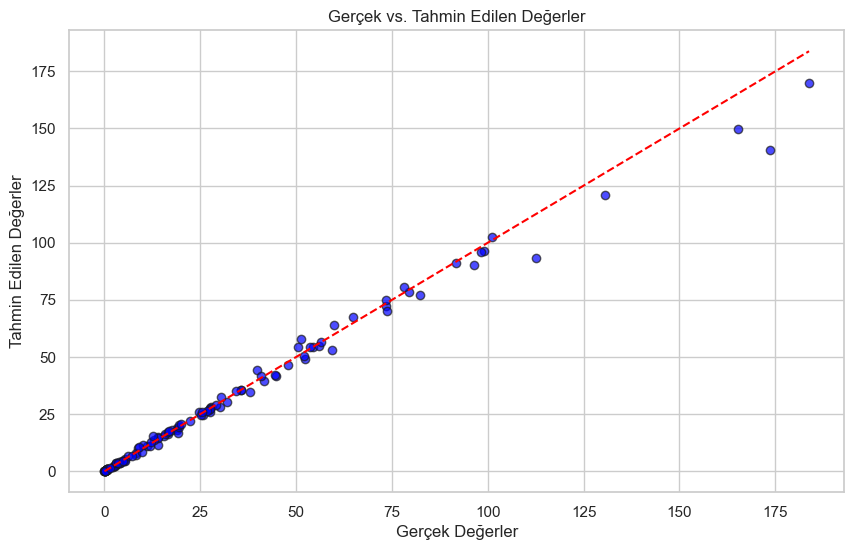

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.show()